In [9]:
import numpy as np
import random

In [23]:
import matplotlib.pyplot as plt

In [24]:
from sklearn.datasets import make_blobs

In [25]:
import seaborn as sns

In [26]:
# Genrates random dataset with 3 centers and there is no use of y in KMeans as algorithm will itself generate the clusters and no prior labels are required
X, y = make_blobs(centers=3, random_state = 42)

C:\Users\Anjali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

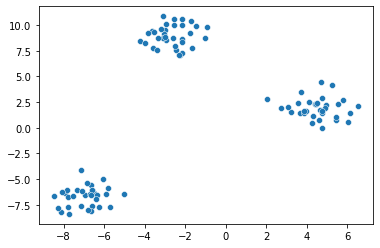

In [27]:
# Plots data on 2 axis i.e. axis 0 and axis 1
sns.scatterplot(X[:,0], X[:,1])

In [28]:
# Cluster class defines every cluster with one center point and other remaining points in the cluster
class Cluster:
    def __init__(self, center):
        self.center = center
        self.points = []
        
    # Function returns the distance of each point in the cluster from its cluster center
    def distance(self, point):
        return np.sqrt(np.sum((point - self.center) ** 2))

In [32]:
class CustomKMeans:
    def __init__(self, n_clusters, max_iters=20):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        
    # Initially generates clusters by randomly choosing points from dataset as its center
    def fit(self, X):
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center= random.choice(X))
            clusters.append(cluster)
            
        # Try to optimize the clustering process by iterating max_iters time by reducing the error
        for i in range(self.max_iters):
            labels = []
            
            # Each point is added to some cluster
            for point in X:
                distances = []
                # Distance between each point in X and cluster centers is found
                for cluster in clusters:
                    distances.append(cluster.distance(point))
                    
                # Point is added to cluster with min distance between the point and the respective cluster center
                closest_idx = np.argmin(distances)
                closest_cluster = clusters[closest_idx]
                closest_cluster.points.append(point)
                labels.append(closest_idx)
                
            # New cluster center is found for every cluster by finding mean of points about axis=0
            for cluster in clusters:
                cluster.center = np.mean(cluster.points, axis=0)
                
        self.labels_ = labels
        self.cluster_centers_ = [cluster.center for cluster in clusters]
                

C:\Users\Anjali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


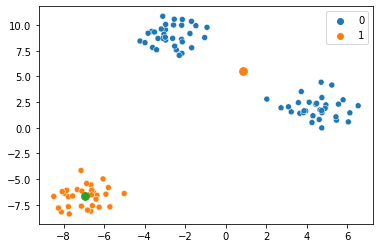

In [33]:
model = CustomKMeans(n_clusters=2)

model.fit(X)
sns.scatterplot(X[:, 0], X[:, 1], hue=model.labels_)
# Plot cluster centers
for center in model.cluster_centers_:
    plt.scatter(center[0], center[1], s=60)